**MALARIA** **DATASET** **CLASSIFICATION**
**DATASET**

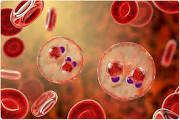

BUSINESS CASE

Malaria is a life-threatening disease. It’s typically transmitted through the bite of an infected Anopheles mosquito. Infected mosquitoes carry the Plasmodium parasite.
When this mosquito bites you, the parasite is released into your bloodstream.Once the parasites are inside your body, they travel to the liver, where they mature. After several days, the mature parasites enter the bloodstream and begin to infect red blood cells.Within 48 to 72 hours, the parasites inside the red blood cells multiply, causing the infected cells to burst open.
The parasites continue to infect red blood cells, resulting in symptoms that occur in cycles that last two to three days at a time.
Malaria is typically found in tropical and subtropical climates where the parasites can live. The World Health Organization (WHO)Trusted Source states that, in 2016, there were an estimated 216 million cases of malaria in 91 countries. By training a classification model on a dataset of labeled blood cell images, the objective is to create a model that can accurately discriminate between infected and uninfected cells. The model can then be used to classify new, unseen blood cell images, potentially aiding in the early detection and diagnosis of malaria infections.

The ultimate goal of the malaria of this classification is to develop a reliable and efficient algorithm that can assist healthcare professionals in diagnosing malaria more quickly and accurately, especially in regions where access to skilled medical personnel and diagnostic facilities may be limited.
Thamk you.::

In [ ]:
#Importation of libraries
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, Lambda, MaxPooling2D
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization#Convolution layers of the network
#MaxPool2D is a pooling layer for feature extraction(features with most importance)
#Dropout is used to prevent overfit and vomit some learnings
#Flatten is used as a bridge to move from  convolution layer to other layers
#Dense is a hidden layers
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img#This library is used for image augmentation thus
#Image augmentation increases data for better results
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob # used to tell the number of folders present in the dataset.
import matplotlib.pyplot as plt
import cv2 #Image and Video Processing: cv2 provides functions to read, write, and manipulate images and videos
import os #The os module provides a way to interact with the operating system and perform various system-related tasks.
# It offers functions and methods to manipulate files and directories
from PIL import Image #Pillow library used to manipulate images
from tensorflow.keras.callbacks import EarlyStopping#Early stopping is a technique used in deep learning to prevent
#overfitting and improve the generalization of a model during the training process.
from keras.utils import plot_model, load_img, img_to_array #This libraries convert images from raw format to array format like numpy arrays
import tensorflow as tf
print('We have used {} tensorflow version'.format(tf.__version__))
from keras.optimizers import Adam #Optimizers
from keras.callbacks import ModelCheckpoint #Used to save mode
import glob


We have used 2.12.0 tensorflow version


In [ ]:

# code to to mount google drive so asto access the image folders
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# LOAD DATASET

In [ ]:
#Creating dataset from given data for exploratory findings
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/ai internship/MAL/cell_images",
    shuffle=True,
    image_size = (224,224),
    batch_size = 16
)

Found 26232 files belonging to 2 classes.


Comment:Image Folder contains 26233 images belonging to two **classes**

In [ ]:
class_names = dataset.class_names
class_names

['Parasitized', 'Uninfected']

Comment: The image folder contains two categories i.e tha Parasitised and Uninfected Images


In [ ]:
#Exploring thw shape and number of channels(color) of individual images

for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())

(16, 224, 224, 3)
[0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1]


Comment: Imagesize found to be 128,128 ,with 3 channels Red,Green,Blue(colored images), with a batch size of 16.

In [ ]:
## Number of images in each Class
import os

dataset_path = "/content/drive/MyDrive/ai internship/MAL/cell_images"  # Replace with the actual path to the dataset

infected_dir = os.path.join(dataset_path, "Parasitized")
uninfected_dir = os.path.join(dataset_path, "Uninfected")

infected_images = os.listdir(infected_dir)
uninfected_images = os.listdir(uninfected_dir)

num_infected_images = len(infected_images)
num_uninfected_images = len(uninfected_images)

print("Number of infected cell images:", num_infected_images)
print("Number of uninfected cell images:", num_uninfected_images)

Number of infected cell images: 13072
Number of uninfected cell images: 13162


Comment: In the image data folder,13072 images belonged to infected Category while 13163 belonged to the uninfected category

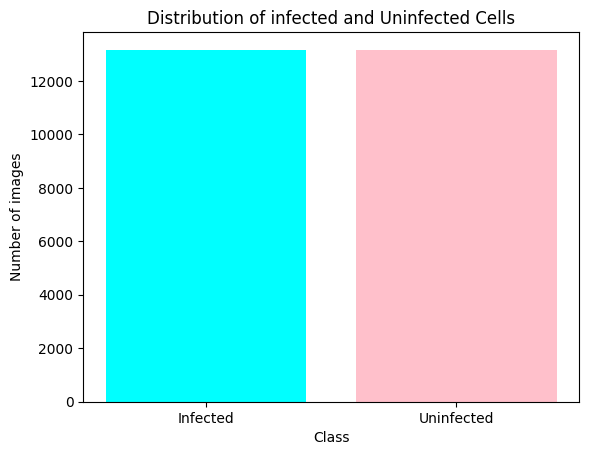

In [ ]:
## VISUALIZING THE DISTRIBUTION OF IMAGES IN THE DATASET
num_images = []
data_dir = '/content/drive/MyDrive/ai internship/MAL/cell_images'
classes = ['Infected','Uninfected']
for class_name in classes:
    class_dir = os.path.join(data_dir,class_name)
num_images.append(len(os.listdir(class_dir)))
plt.bar(classes,num_images, color = ['cyan','pink'])
plt.title('Distribution of infected and Uninfected Cells')
plt.xlabel('Class')
plt.ylabel('Number of images')
plt.show()



In [ ]:
#The infected sub categories tend to have slightly more images than the uninfected categories.

## VISUALIZATION OF BOTH PARASITIC AND UNINFECTED CELLS

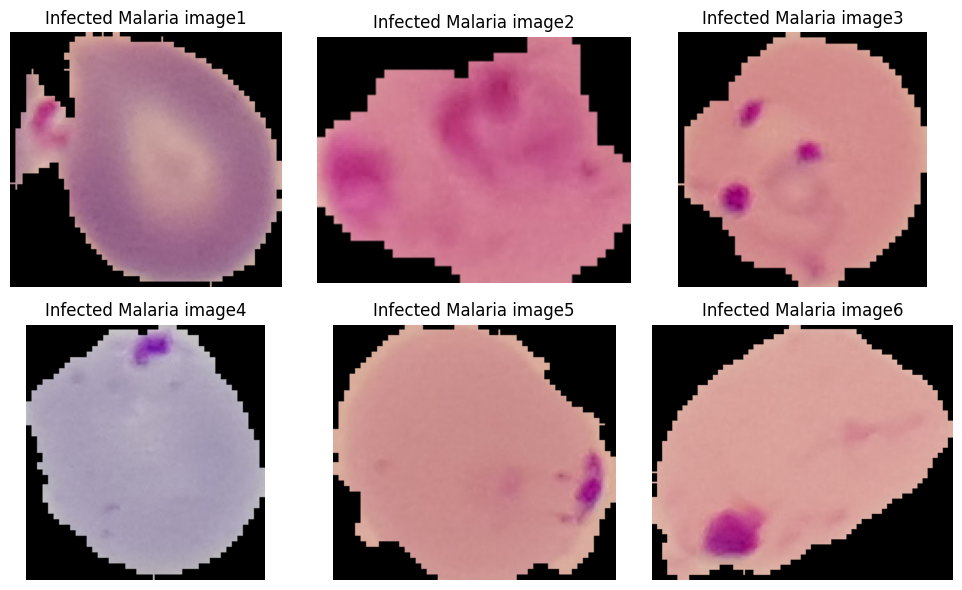

In [ ]:
#For parasitised category
infected_images_directory= '/content/drive/MyDrive/ai internship/MAL/cell_images/Parasitized'
infected_images = []
for filename in os.listdir(infected_images_directory):
  if filename.endswith('.png'):
    image_path = os.path.join(infected_images_directory,filename)
    image = cv2.imread(image_path)
    infected_images.append(image)
fig,axes = plt.subplots(2,3,figsize = (10,6))
axes = axes.ravel()
for i in range(6):
  axes[i].imshow(cv2.cvtColor(infected_images[i],cv2.COLOR_BGR2RGB)),axes[i].set_title(f'Infected Malaria image{i+1}')
  axes[i].axis('off')
plt.tight_layout()
plt.show()

Comment:The parasitised image presents with a darker colored patch on the image indicating the parasite concentration.

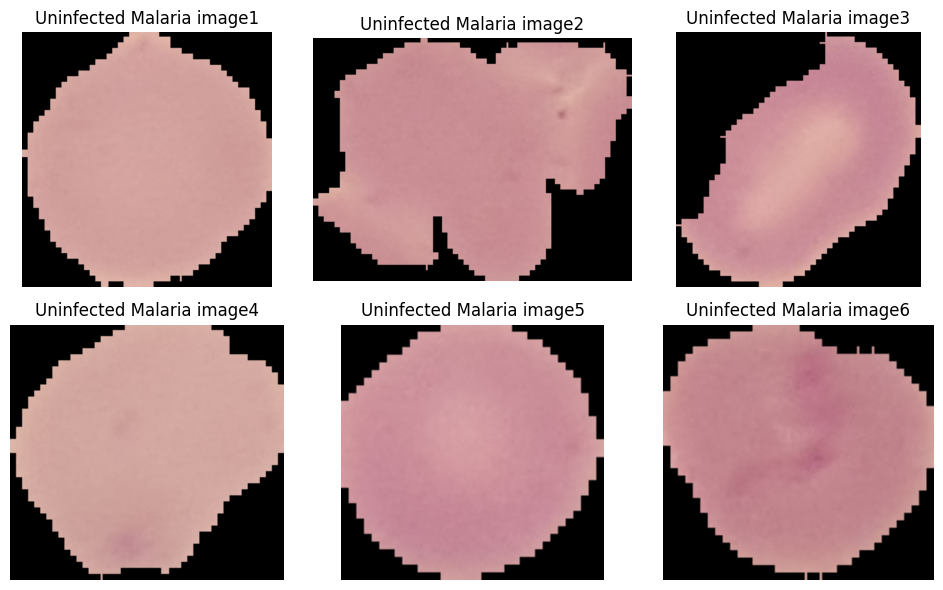

In [ ]:
#For uninfected category
Uninfected_images_directory= '/content/drive/MyDrive/ai internship/MAL/cell_images/Uninfected'
Uninfected_images = []
for filename in os.listdir(Uninfected_images_directory):
  if filename.endswith('.png'):
    image_path = os.path.join(Uninfected_images_directory,filename)
    image = cv2.imread(image_path)
    Uninfected_images.append(image)
fig,axes = plt.subplots(2,3,figsize = (10,6))
axes = axes.ravel()
for i in range(6):
  axes[i].imshow(cv2.cvtColor(Uninfected_images[i],cv2.COLOR_BGR2RGB)),axes[i].set_title(f'Uninfected Malaria image{i+1}')
  axes[i].axis('off')
plt.tight_layout()
plt.show()

Commnet: The image presents with totally clear slide with no no patch on th image indicating complete absence of the parasite

# PREPROCESSING and DATAGENERATION


## RESIZING OF IMAGES

In [ ]:
#Prividing image size to be included in the generator parameter.
width = 224
height = 224

In [ ]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)
#splitting the data to training and testing in the ratio of 80%:20%

Data generation refers to the process of creating or augmenting training data to increase the diversity, size, or quality of the dataset used for model training. Data generation techniques are employed to improve the performance and generalization capabilities of deep learning models.

In [ ]:
trainDatagen = datagen.flow_from_directory(directory='/content/drive/MyDrive/ai internship/MAL/cell_images',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

Found 20986 images belonging to 2 classes.


In [ ]:
valDatagen = datagen.flow_from_directory(directory='/content/drive/MyDrive/ai internship/MAL/cell_images',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation')

Found 5246 images belonging to 2 classes.


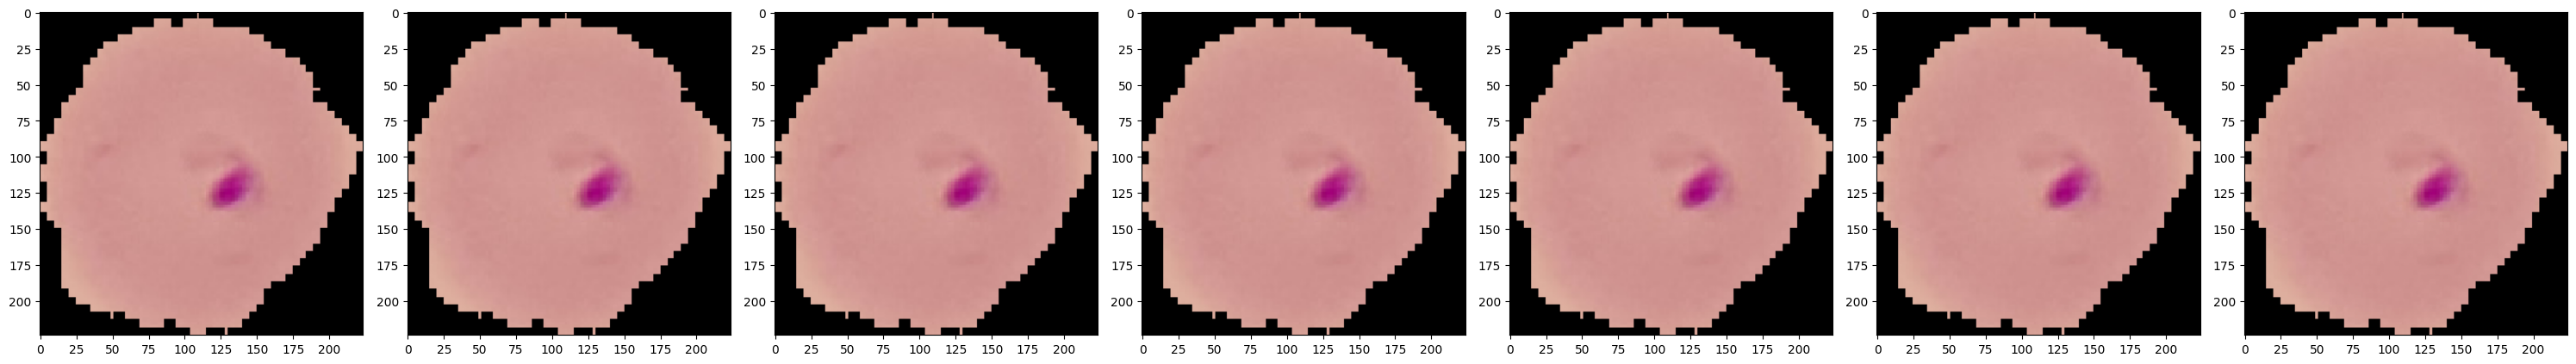

In [ ]:
# Visualising test image to see how they look, object oriented ploting using matplotlib
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 7, figsize=(30, 30))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

images = [trainDatagen[0][0][0] for i in range(7)]
plotImages(images)
#This is how it make changes to each image in training model for better result

In [ ]:
#Early stopping reduces time complexity and increases efficiency so i will be using earlystopping in transfer learning as well.

In [ ]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3)) #Dropout is a regularization technique commonly used in deep learning to prevent overfitting
#so the model learns from 70% of the data only

model.add(Flatten())
model.add(Dense(64,activation='relu'))#This is the fully connected (1 hidden layer)
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))#This is the output layer with output with activation function
#sigmoid for binary classification

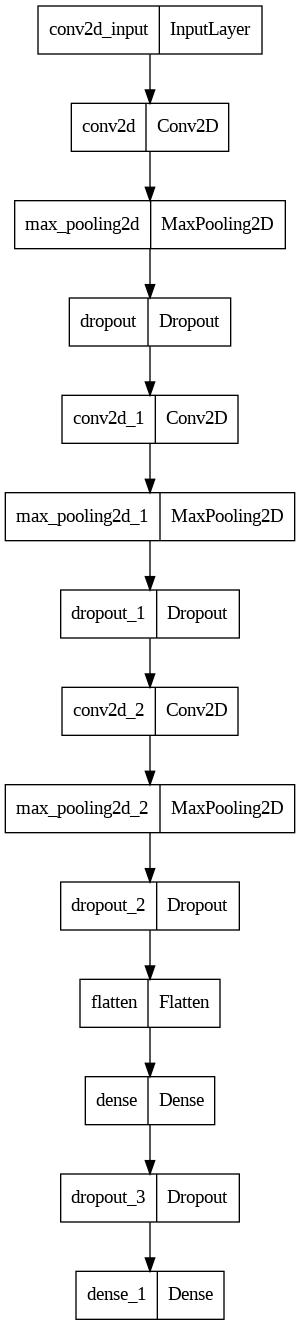

In [ ]:
plot_model(model)

In [ ]:
#compiling the model.
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=3, save_best_only=True)
#Model checkpointing is a technique used in deep learning to save the weights or parameters of a model during training

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)
#Early stopping is a technique commonly used in deep learning to prevent overfitting and improve model generalization.

In [ ]:
#batch size The batch size is a hyperparameter that determines the number of samples processed by the model in each training iteration.
batch_size = 64

In [ ]:
#Early stopping reduces time complexity and increases efficiency so i will be using earlystopping in transfer learning as well.

In [ ]:
history = model.fit(trainDatagen,
                             steps_per_epoch = len(trainDatagen),
                              epochs =5,
                              shuffle = True,
                              batch_size = 64,
                              validation_data = valDatagen,
                              validation_steps=len(valDatagen),
                             callbacks=[early_stop, checkpointer])

Epoch 1/5
1312/1312 [==============================] - ETA: 0s - loss: 0.6056 - accuracy: 0.6702
Epoch 1: val_loss improved from inf to 0.30966, saving model to model.weights.best.hdf5
1312/1312 [==============================] - 1637s 1s/step - loss: 0.6056 - accuracy: 0.6702 - val_loss: 0.3097 - val_accuracy: 0.9144
Epoch 2/5
1312/1312 [==============================] - ETA: 0s - loss: 0.3022 - accuracy: 0.9031
Epoch 2: val_loss improved from 0.30966 to 0.22363, saving model to model.weights.best.hdf5
1312/1312 [==============================] - 1452s 1s/step - loss: 0.3022 - accuracy: 0.9031 - val_loss: 0.2236 - val_accuracy: 0.9369
Epoch 3/5
1312/1312 [==============================] - ETA: 0s - loss: 0.1818 - accuracy: 0.9463
Epoch 3: val_loss did not improve from 0.22363
1312/1312 [==============================] - 1399s 1s/step - loss: 0.1818 - accuracy: 0.9463 - val_loss: 0.2376 - val_accuracy: 0.9258
Epoch 4/5
1312/1312 [==============================] - ETA: 0s - loss: 0.1526

In [ ]:
#MODEL EVALUATION

PLOTS of training and validation loss and accuracies

In [ ]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

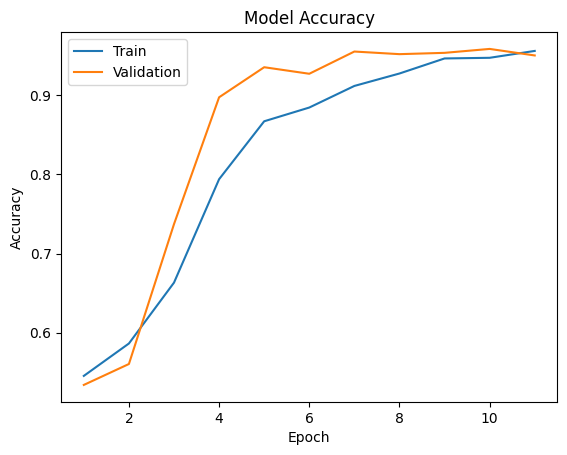

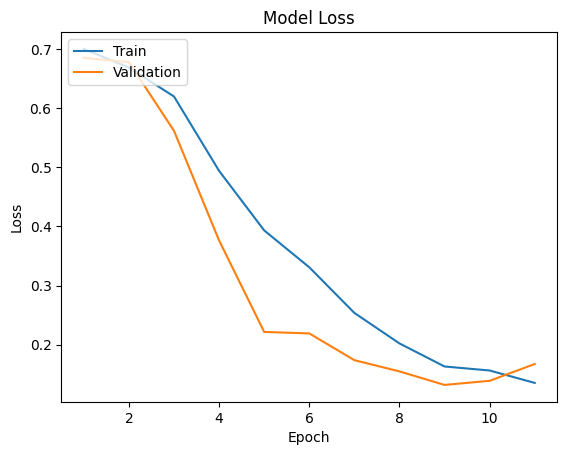

In [ ]:
plotLearningCurve(history,11)

In [ ]:
#Test accuracy score
score = model.evaluate(valDatagen, verbose=0)
accuracy = 100*score[1]

#Print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 94.6245%


In [ ]:
#Train accuracy score
score = model.evaluate(trainDatagen, verbose=0)
accuracy = 100*score[1]

#Print test accuracy
print('Train accuracy: %.4f%%' % accuracy)

Train accuracy: 96.1117%


#  Testing  a sample of images with their predicted labels and Ground Truth

In [ ]:
#INFERENCING I.E trying the performance on newly downloaded image to see how well your model can predict with  accuracy
import numpy as np
from tensorflow.keras.preprocessing import image
predictions = ["Parasitized","Uninfected"] #Ahmed this is where younsuctomize your labels base on glob info
test_image = image.load_img('/content/drive/MyDrive/infer/Copy of C37BP2_thinF_IMG_20150620_133111a_cell_87.png', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
predictions[result.argmax()]

1/1 [==============================] - 0s 299ms/step


'Parasitized'

In [ ]:
# The model Predicted accurately a sample image drawn from the dataset.

## Conclusion & Future Improvements <a id='conc-fut'></a>

- Data showed a bit of overfitting due lower number of epochs during traing.Tried to training for 10 epochs and the process crashed due to the massiveness of the dataset.
- Further, we can also train on higher number of epochs and increase  to increase the dataset and improve the accuracy.Thank you




